In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#read data
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [ ]:
# info() gives you structural information about the dataset
df.info()
df.describe()

In [ ]:
# check the first five rows of data
df.head()

In [21]:
# count the number of the churned user and not churned user
churn_counts = df['Churned'].value_counts()
print(churn_counts)

Churned
0    754
1    246
Name: count, dtype: int64


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/3914115572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


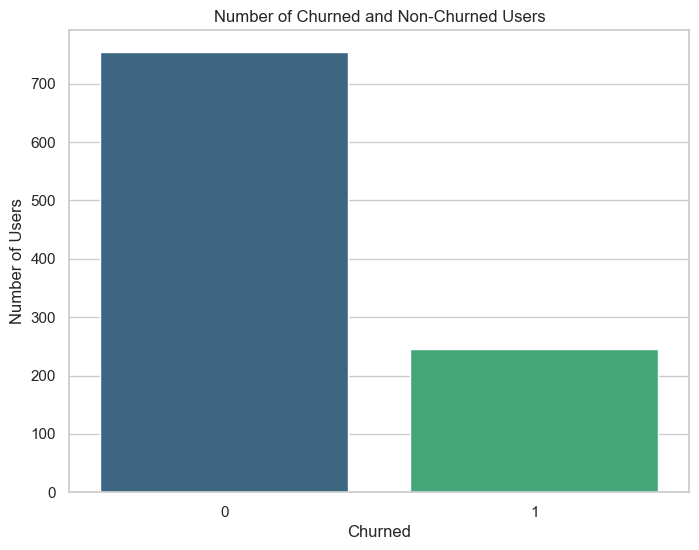

In [218]:
# create the barplot for the number of retained users and churn users
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
plt.title('Number of Churned and Non-Churned Users')
plt.xlabel('Churned')
plt.ylabel('Number of Users')
plt.show()

Text(0, 0.5, 'Percentage Of Churned')

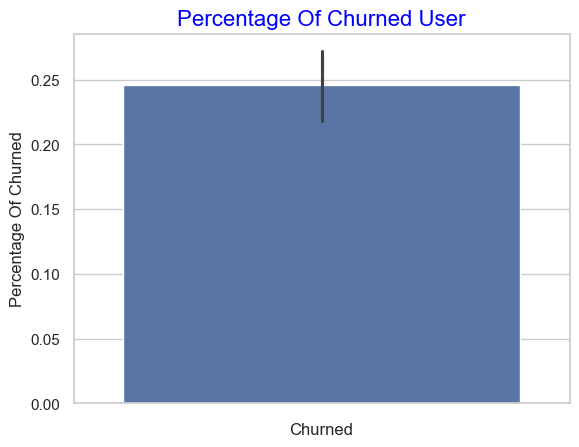

In [66]:
#create barplot for the percentage of Churned User
sns.barplot( y='Churned', data=df)
plt.title("Percentage Of Churned User", fontsize=16, color='blue')
plt.xlabel('Churned')
plt.ylabel('Percentage Of Churned')

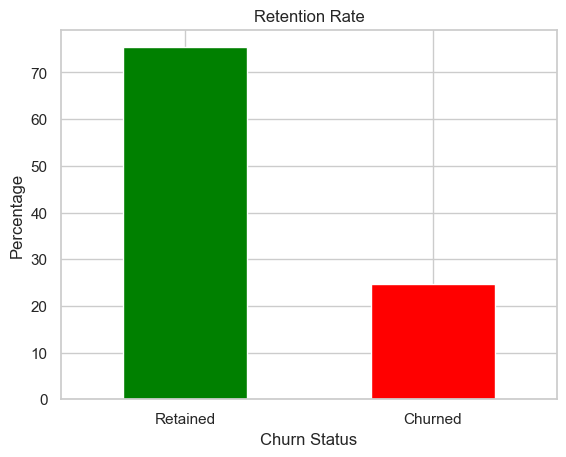

In [50]:
# calculate the retention rate and churned rate
retention_rate = df['Churned'].value_counts(normalize=True) * 100

# create the boxplot of the retention rate
fig, ax = plt.subplots()
retention_rate.plot(kind='bar', color=['green', 'red'], ax=ax)
ax.set_title('Retention Rate')
ax.set_xlabel('Churn Status')
ax.set_ylabel('Percentage')
ax.set_xticklabels(['Retained', 'Churned'], rotation=0)

plt.show()


In [169]:
# calculate the total user and retained user by age with every 10 years
bins = [17, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39','40-49','50-59','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'Age_Group']].head(10))

age_retention = df.groupby('Age_Group').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

age_retention['retention_rate'] = (age_retention['retained_users'] / age_retention['total_users']) * 100

print(age_retention)

   Age Age_Group
0   56     50-59
1   69       60+
2   46     40-49
3   32     30-39
4   60     50-59
5   25     18-29
6   38     30-39
7   56     50-59
8   36     30-39
9   40     30-39
           total_users  retained_users  retention_rate
Age_Group                                             
18-29              235             171       72.765957
30-39              174             122       70.114943
40-49              214             171       79.906542
50-59              178             141       79.213483
60+                199             149       74.874372


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/679683537.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_retention = df.groupby('Age_Group').agg(


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/2217679567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_retention.index, y=age_retention['retention_rate'], palette='deep')


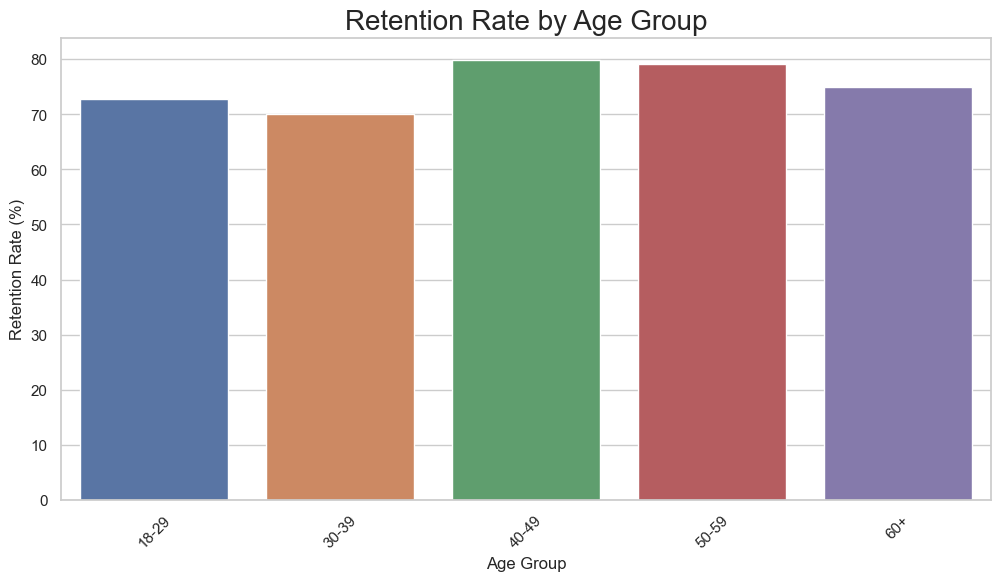

In [176]:
# create barplot for the retention rate by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=age_retention.index, y=age_retention['retention_rate'], palette='deep')
plt.title('Retention Rate by Age Group', fontsize = 20)
plt.xlabel('Age Group')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [219]:
#Calculate the total number of users and retained users for each device
device_retention = df.groupby('Devices_Used').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

device_retention['retention_rate'] = (device_retention['retained_users'] / device_retention['total_users']) * 100
device_retention.reset_index(inplace=True)

print(device_retention)


  Devices_Used  total_users  retained_users  retention_rate
0       Mobile          408             277       67.892157
1           PC          174             147       84.482759
2           TV          201             157       78.109453
3       Tablet          217             173       79.723502


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/436249262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Devices_Used', y='retention_rate', data=device_retention, palette='deep')


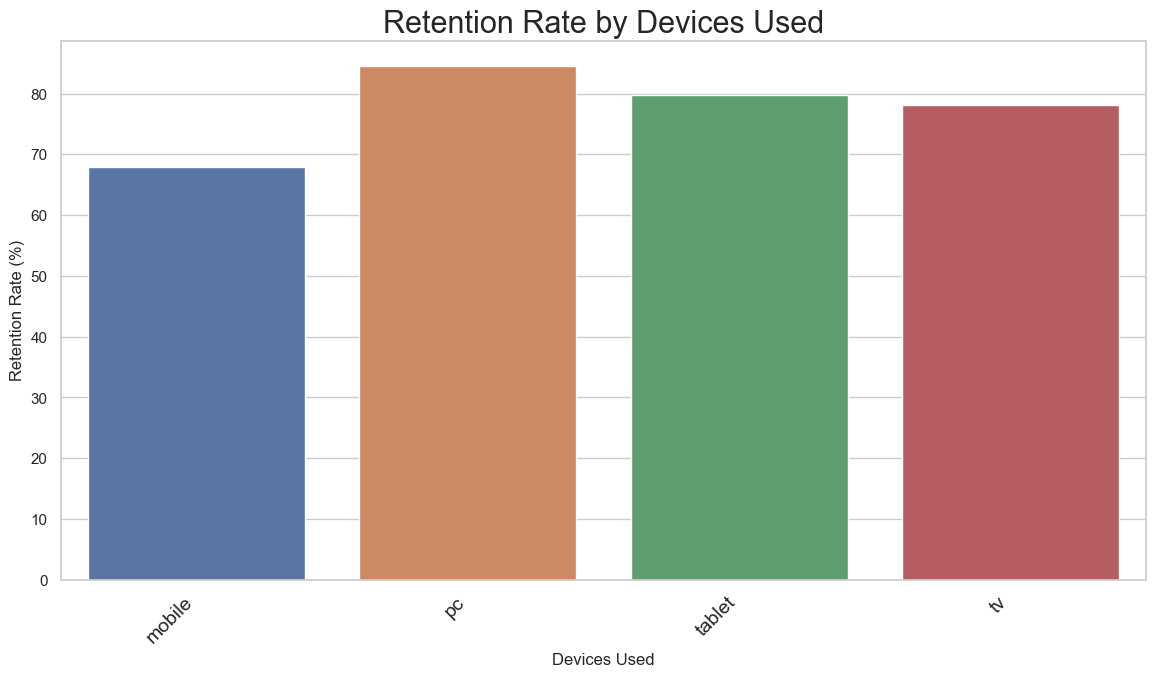

In [186]:
# create the retention rate of each devices used
plt.figure(figsize=(14, 7))
sns.barplot(x='Devices_Used', y='retention_rate', data=device_retention, palette='deep')
plt.title('Retention Rate by Devices Used', fontsize = 22)
plt.xlabel('Devices Used')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right', fontsize= 14) 
plt.show()

Devices_Used
mobile    131
tablet     44
tv         44
pc         27
Name: count, dtype: int64


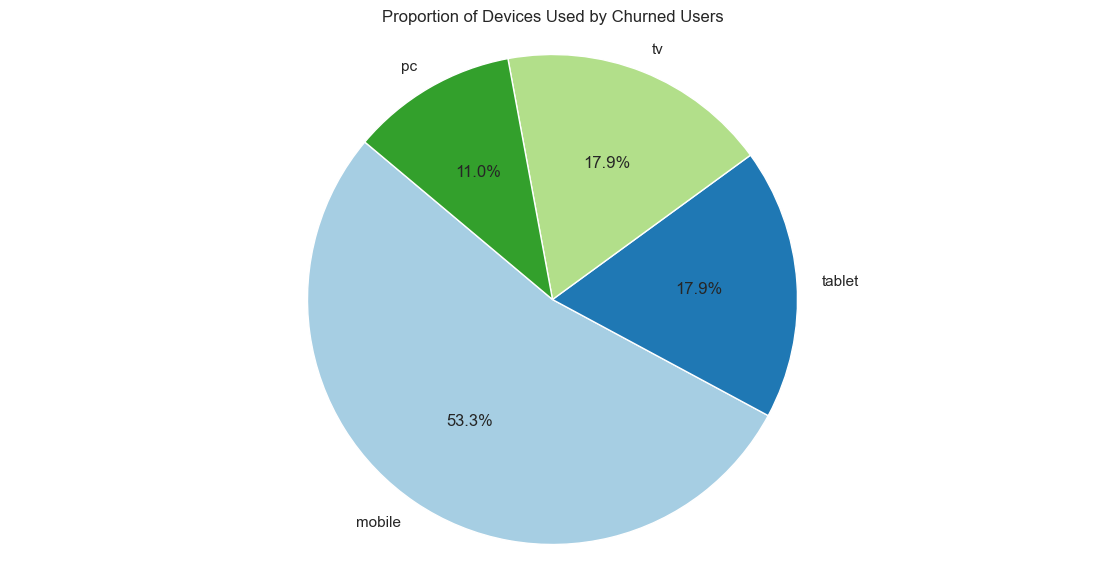

In [182]:
#Count the churned users by each devices used
device_churn_count = churned_users['Devices_Used'].value_counts()

print(device_churn_count)

plt.figure(figsize=(14, 7))
plt.pie(device_churn_count, labels=device_churn_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Devices Used by Churned Users')
plt.axis('equal')  
plt.show()


In [214]:

#Calculate the total users and retained users by each device used
Genre_retention = df.groupby('Favorite_Genre').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

Genre_retention['retention_rate'] = (Genre_retention['retained_users'] / Genre_retention['total_users']) * 100

Genre_retention.reset_index(inplace=True)

print(Genre_retention)

  Favorite_Genre  total_users  retained_users  retention_rate
0         Action          205             156       76.097561
1         Comedy          203             154       75.862069
2    Documentary          188             136       72.340426
3          Drama          212             165       77.830189
4         Sci-Fi          192             143       74.479167


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/1620903085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Favorite_Genre', y='retention_rate', data=Genre_retention, palette='deep')


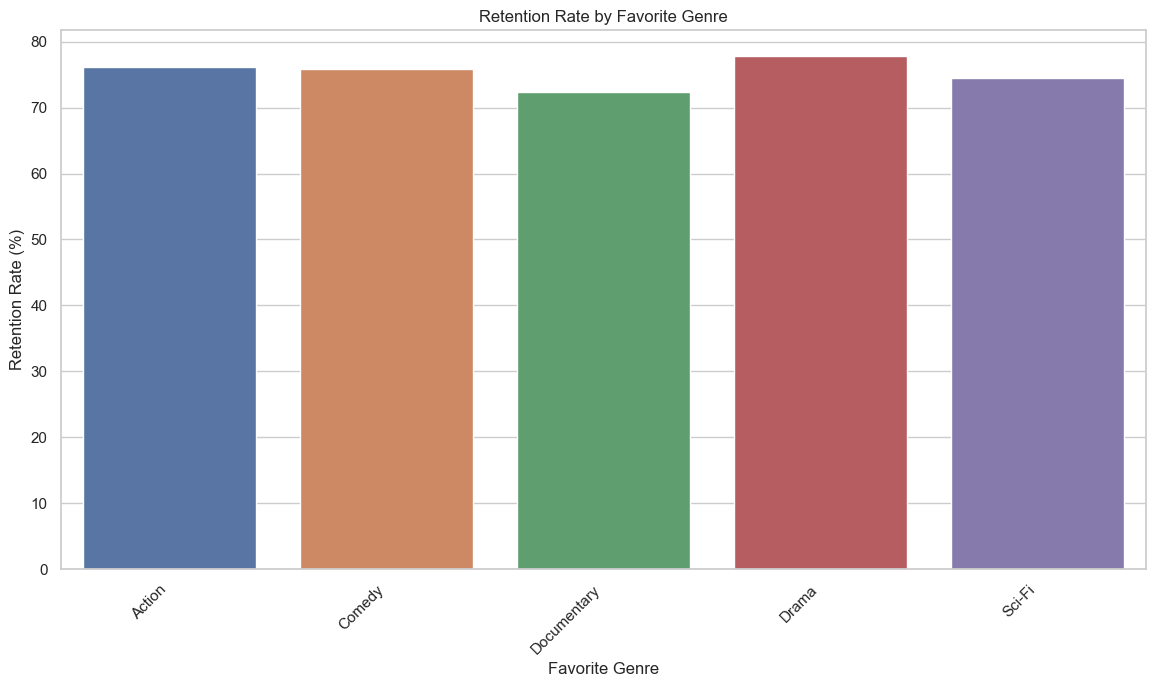

In [217]:
# Create the retention rate by Favorite Genre
plt.figure(figsize=(14, 7))
sns.barplot(x='Favorite_Genre', y='retention_rate', data=Genre_retention, palette='deep')
plt.title('Retention Rate by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()